In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model

## 1. select a one- dimensional function

In [ ]:
# simple function
def calculate(x):
  return x**2

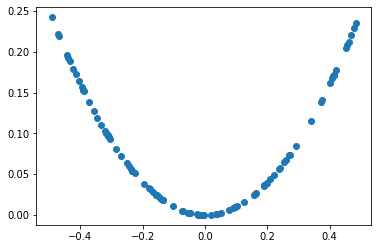

In [ ]:
# generate randoms sample from x^2
def generate_samples(n=100):
  X1 = np.random.rand(n)-0.5
  X2 = X1*X1

  X1 = X1.reshape(n,1)
  X2 = X2.reshape(n,1)
  X = np.hstack((X1,X2))
  Y = np.ones((n,1))
  return X,Y

data, label = generate_samples()
plt.scatter(data[:,0],data[:,1])
plt.show()

In [1]:
def generate_fake_samples(n):
  X1 = -1 + np.random.rand(n) * 2
  X2 = -1 + np.random.rand(n) * 2
  X1 = X1.reshape(n, 1)
  X2 = X2.reshape(n, 1)
  X = np.hstack((X1, X2))
  Y = np.zeros((n,1))

  return X,Y
data, label = generate_fake_samples(100)
plt.scatter(data[:,0],data[:,1])
plt.show()

NameError: ignored

## 2. define a discriminator model

In [ ]:
def discriminator_model(n_inputs=2):
  model = Sequential()
  model.add(Dense(25, activation='relu', kernel_initializer='he_uniform',input_dim=n_inputs))
  model.add(Dense(1,activation='sigmoid'))
  model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
  return model

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 25)                75        
                                                                 
 dense_11 (Dense)            (None, 1)                 26        
                                                                 
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


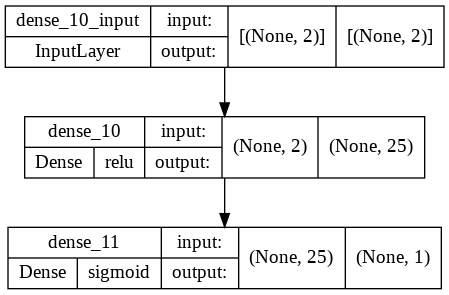

In [ ]:
model = discriminator_model()
model.summary()
plot_model(model, to_file='discriminator_plot.png', 
           show_shapes=True, 
           show_layer_names=True,
           show_layer_activations=True,
           expand_nested=True
           )

In [ ]:
def train_discriminator(model,n_epochs=1000,n_batch=128):
  half_batch = int(n_batch/2)
  for i in range(n_epochs):
    X_real, y_real = generate_samples(half_batch)
    model.train_on_batch(X_real,y_real)
    X_fake, y_fake = generate_fake_samples(half_batch)
    model.train_on_batch(X_fake,y_fake)

    _, acc_real = model.evaluate(X_real, y_real, verbose=0)
    _, acc_fake = model.evaluate(X_fake, y_fake, verbose=0)
    if i % 100 == 0:
      print(i,acc_real,acc_fake)

In [ ]:
model = discriminator_model()
train_discriminator(model)

0 1.0 0.203125
1 1.0 0.359375
2 1.0 0.3125
3 1.0 0.21875
4 1.0 0.21875
5 1.0 0.21875
6 1.0 0.1875
7 1.0 0.234375
8 1.0 0.265625
9 1.0 0.265625
10 1.0 0.21875
11 0.984375 0.3125
12 0.984375 0.28125
13 0.984375 0.40625
14 1.0 0.40625
15 0.953125 0.40625
16 0.984375 0.4375
17 0.984375 0.453125
18 1.0 0.390625
19 0.984375 0.4375
20 0.96875 0.46875
21 0.953125 0.625
22 0.953125 0.46875
23 0.953125 0.546875
24 0.984375 0.59375
25 0.984375 0.65625
26 0.984375 0.59375
27 0.96875 0.65625
28 1.0 0.5625
29 0.9375 0.484375
30 0.984375 0.625
31 0.96875 0.578125
32 0.953125 0.5
33 0.875 0.546875
34 0.9375 0.625
35 0.921875 0.5625
36 0.921875 0.6875
37 0.90625 0.546875
38 0.9375 0.5625
39 0.921875 0.625
40 0.96875 0.609375
41 0.875 0.53125
42 0.9375 0.6875
43 0.9375 0.734375
44 0.9375 0.734375
45 0.90625 0.671875
46 0.890625 0.59375
47 0.90625 0.609375
48 0.84375 0.625
49 0.890625 0.78125
50 0.921875 0.703125
51 0.875 0.765625
52 0.890625 0.765625
53 0.875 0.765625
54 0.90625 0.734375
55 0.921875 0.7

## 3. define a generator model

In [ ]:
def generator_model(latent_dim, n_outputs=2):
  model = Sequential()
  model.add(Dense(15, activation='relu', kernel_initializer='he_uniform',input_dim=latent_dim))
  model.add(Dense(n_outputs,activation='linear'))
  return model

In [ ]:
model = generator_model(5)
model.summary()
plot_model(model, to_file='generator_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
def generate_latent_points(latent_dim, n):
  x_input = np.random.randn(latent_dim * n)
  x_input = x_input.reshape(n, latent_dim)
  return x_input

In [ ]:
def generate_fake_samples(generator, latent_dim, n):
  x_input = generate_latent_points(latent_dim, n)
  X = generator.predict(x_input)
  y = np.zeros((n, 1))
  return X, y

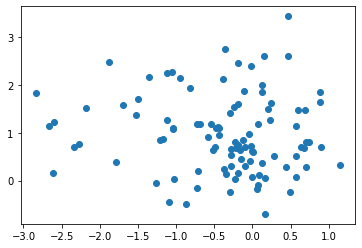

In [ ]:
latent_dim = 5
model = generator_model(latent_dim)
generate_fake_samples(model, latent_dim, 100)

## 4. training the generator model

In [ ]:
def gan_model(generator, discriminator):
  discriminator.trainable = False
  model = Sequential()
  model.add(generator)
  model.add(discriminator)
  model.compile(loss='binary_crossentropy', optimizer='adam')
  return model

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_13 (Sequential)  (None, 2)                 122       
                                                                 
 sequential_12 (Sequential)  (None, 1)                 101       
                                                                 
Total params: 223
Trainable params: 122
Non-trainable params: 101
_________________________________________________________________


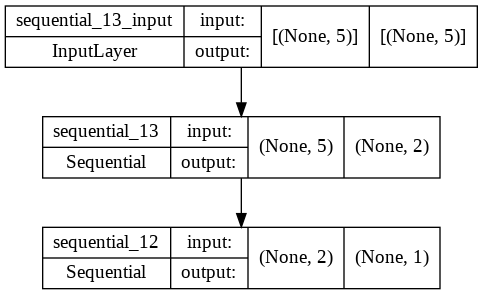

In [ ]:
latent_dim = 5
discriminator_model = discriminator_model()
generator_model = generator_model(latent_dim)
gan_model = gan_model(generator_model, discriminator_model)
gan_model.summary()
plot_model(gan_model, to_file='gan_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
def train_gan(gan_model, latent_dim, n_epochs=10000, n_batch=128):
  for i in range(n_epochs):
    x_gan = generate_latent_points(latent_dim,n_batch)
    y_gan = np.ones((n_batch,1))
    gan_model.train_on_batch(x_gan,y_gan)

## 5. Evaluating the performance of the Gan

In [ ]:
def summarize_performance(epoch, generator, discriminator, latent_dim, n=100):
	# prepare real samples
	x_real, y_real = generate_samples(n)
	# evaluate discriminator on real examples
	_, acc_real = discriminator.evaluate(x_real, y_real, verbose=0)
	# prepare fake examples
	x_fake, y_fake = generate_fake_samples(generator, latent_dim, n)
	# evaluate discriminator on fake examples
	_, acc_fake = discriminator.evaluate(x_fake, y_fake, verbose=0)
	# summarize discriminator performance
	print(epoch, acc_real, acc_fake)
	# scatter plot real and fake data points
	plt.scatter(x_real[:, 0], x_real[:, 1], color='red')
	plt.scatter(x_fake[:, 0], x_fake[:, 1], color='blue')
	plt.show()

In [ ]:
def train(g_model, d_model, gan_model, latent_dim, n_epochs=10000, n_batch=128):
  half_batch = int(n_batch / 2)
  for i in range(n_epochs):
    x_real, y_real = generate_samples(half_batch)
    x_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
    d_model.train_on_batch(x_real, y_real)
    d_model.train_on_batch(x_fake, y_fake)

    x_gan = generate_latent_points(latent_dim, n_batch)
    y_gan = np.ones((n_batch, 1))

    gan_model.train_on_batch(x_gan, y_gan)

    if i % 1000 == 0:
      summarize_performance(i,g_model, d_model, latent_dim)

In [ ]:
x_real, y_real = generate_samples(64)
x_fake, y_fake = generate_fake_samples(generator_model, latent_dim, 64)

0 0.6800000071525574 0.14000000059604645


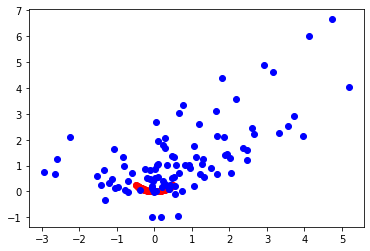

1000 0.8700000047683716 0.46000000834465027


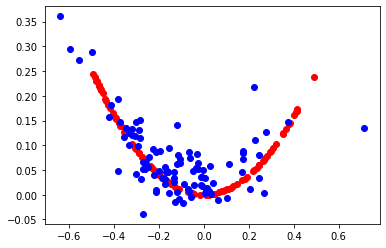

2000 0.5199999809265137 0.5199999809265137


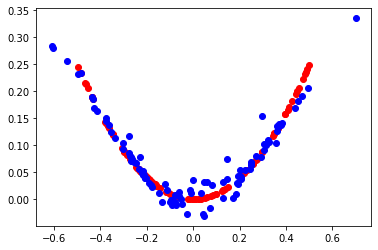

3000 0.6600000262260437 0.4300000071525574


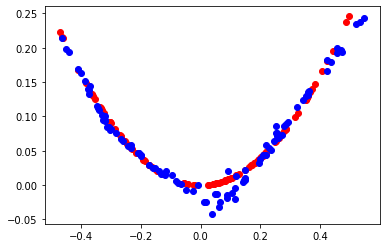

4000 0.5699999928474426 0.5099999904632568


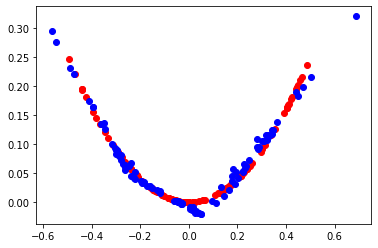

5000 0.46000000834465027 0.6100000143051147


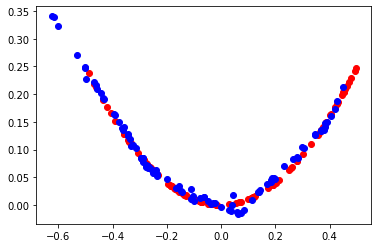

6000 0.47999998927116394 0.5699999928474426


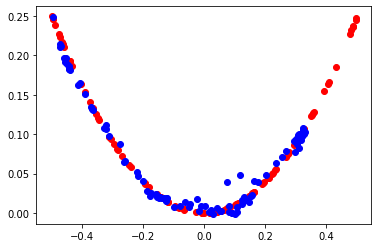

7000 0.3100000023841858 0.6299999952316284


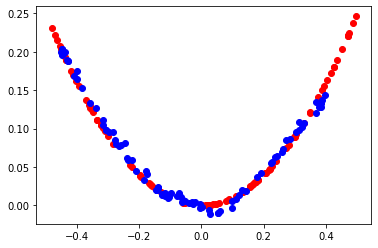

8000 0.5099999904632568 0.5400000214576721


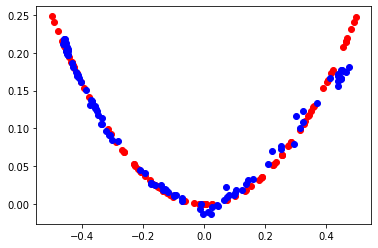

9000 0.28999999165534973 0.6399999856948853


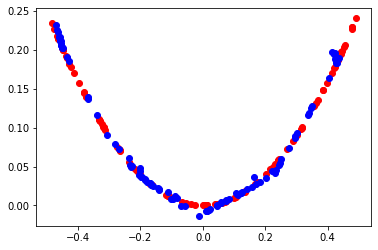

In [ ]:
train(generator_model, discriminator_model, gan_model, latent_dim)

## 6. complete example of trainig the gan

In [ ]:
x_fake